### Loading Fashion-MNIST dataset, builds and trains a convolutional neural network (CNN) model using the Adam optimizer.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

### Dataset and normalizes the pixel values of both the training and testing data to a range between 0 and 1.

In [27]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshapes the training and testing data arrays to have an additional dimension representing grayscale images.

In [28]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Splits the training data

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### The baseline CNN model for Fashion-MNIST classification is trained for 10 epochs using Adam optimizer and sparse categorical cross-entropy loss, with validation accuracy metrics stored in `baseline_history`.

In [30]:
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 75s 49ms/step - loss: 0.5221 - accuracy: 0.8091 - val_loss: 0.3915 - val_accuracy: 0.8563
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3342 - accuracy: 0.8778 - val_loss: 0.3229 - val_accuracy: 0.8824
Epoch 3/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.2862 - accuracy: 0.8946 - val_loss: 0.2839 - val_accuracy: 0.8953
Epoch 4/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2564 - accuracy: 0.9045 - val_loss: 0.2656 - val_accuracy: 0.9053
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2312 - accuracy: 0.9151 - val_loss: 0.2731 - val_accuracy: 0.9015
Epoch 6/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2117 - accuracy: 0.9216 - val_loss: 0.2614 - val_accuracy: 0.9069
Epoch 7/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.1906 - accuracy: 0.9298 - val_loss: 0.2539 -

### The code line evaluates the baseline model's accuracy on the testing dataset (`X_test`, `y_test`) and prints the resulting accuracy score.

In [31]:
baseline_loss, baseline_accuracy = baseline_model.evaluate(X_test, y_test)
print("Baseline Model Accuracy:", baseline_accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 0.2911 - accuracy: 0.9047
Baseline Model Accuracy: 0.904699981212616


### The code saves and loads a Keras model from "improved_model.h5", then uses the loaded model to predict outcomes on the testing dataset X_test.

In [41]:
from keras.models import load_model

baseline_model.save("improved_model.h5")
loaded_model = load_model("improved_model.h5")
predictions = loaded_model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


### Shows training and validation plots

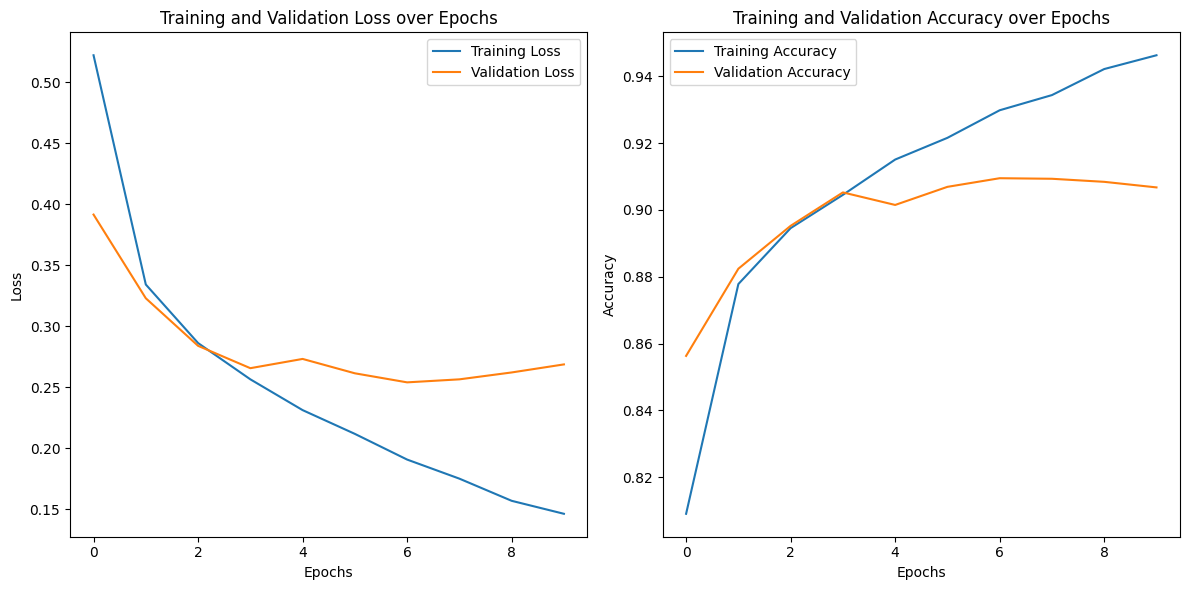

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

### Heatmap visualization of the confusion matrix

313/313 [==============================] - 3s 9ms/step


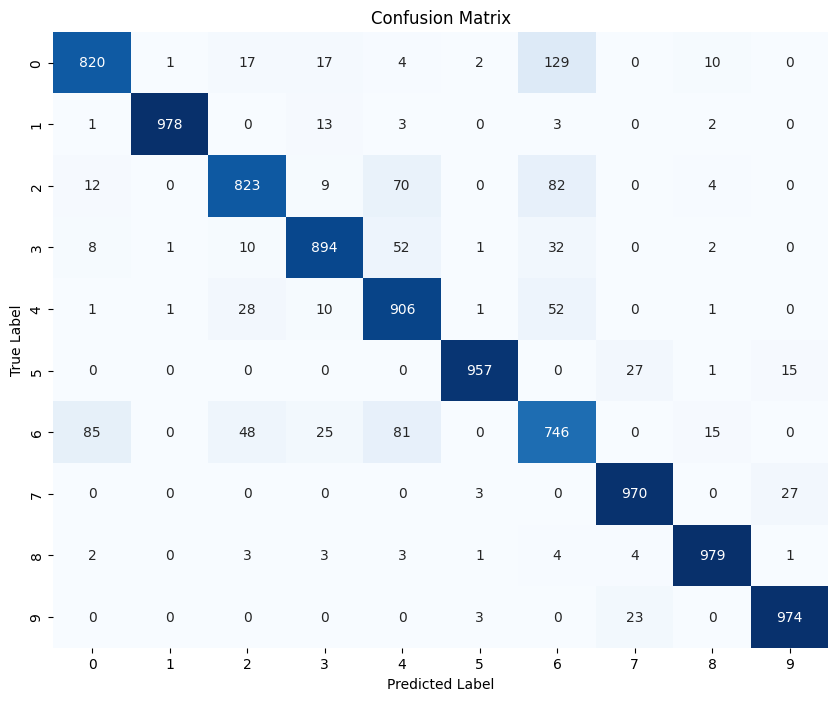

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_probs = baseline_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


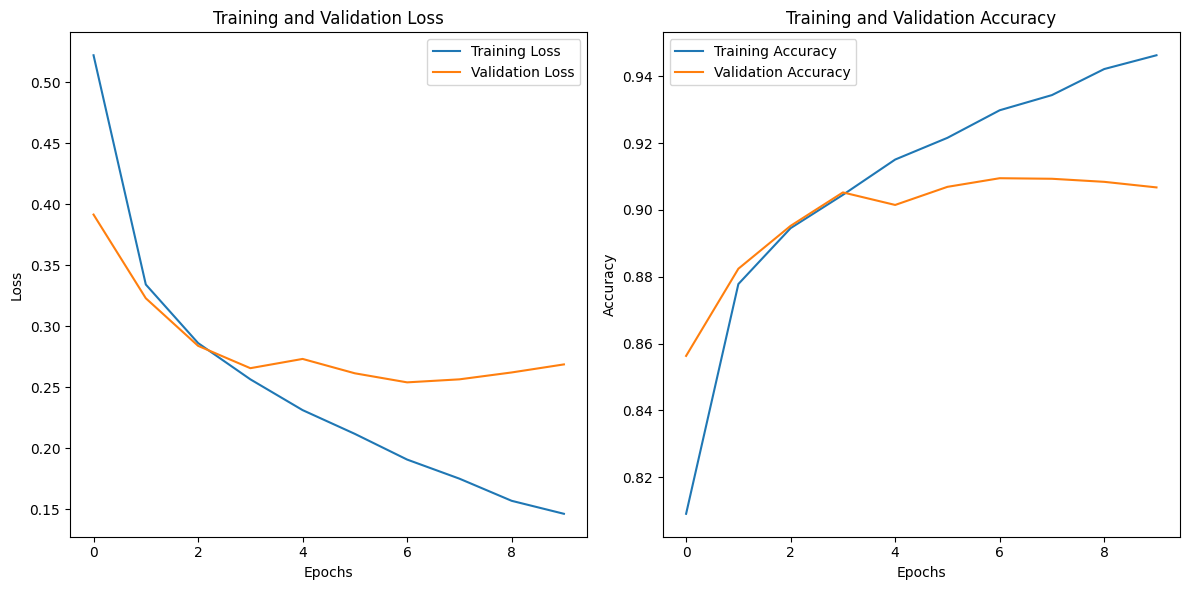

In [34]:
plt.figure(figsize=(12, 6))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 4s 13ms/step


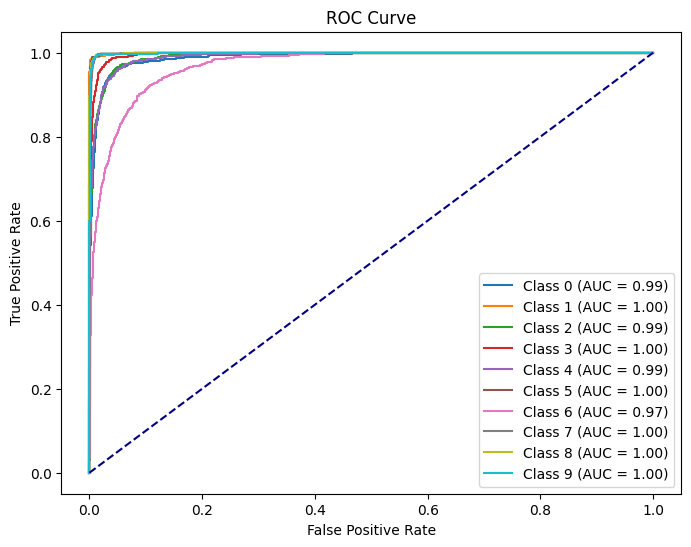

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_prob = baseline_model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


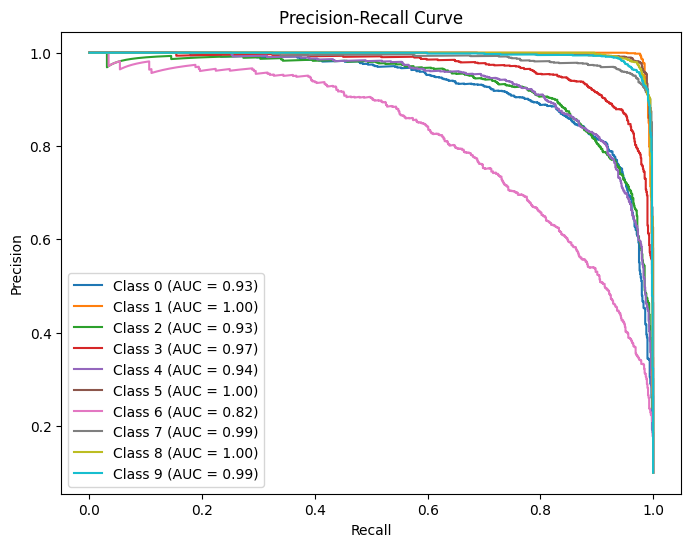

In [37]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(lb.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {lb.classes_[i]} (AUC = {pr_auc[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


The key modifications made to the baseline model for the new Fashion-MNIST dataset are as follows:

1. **Dataset Selection**:Fashion-MNIST, which has grayscale images of clothing items and 10 classes. This change accounts for differences in data distribution and complexity.

2. **Model Architecture**: Retained a similar architecture but adjusted for Fashion-MNIST's input shape (28x28 grayscale images). Consisted of convolutional layers, max-pooling layers, flattening, and dense layers with ReLU activation for convolutional layers and softmax for the output layer.

3. **Normalization**: Applied pixel value normalization by dividing by 255.0, ensuring stable training by scaling input features.

4. **Training Parameters**: Trained for 10 epochs with Adam optimizer and sparse categorical cross-entropy loss. Parameters such as batch size and learning rate remained consistent.

5. **Evaluation and Analysis**: Evaluated the model's performance on the test set using accuracy and loss metrics. Visualizations like confusion matrix, loss-accuracy plots, ROC curve, and precision-recall curve provided insights into classification, convergence, and discrimination ability.

6. **Improvement Assessment**: Compared the modified model's metrics and visualizations with the baseline to assess performance. If the modified model showed higher accuracy, lower loss, improved convergence, and discrimination, it demonstrated positive response to changes.
